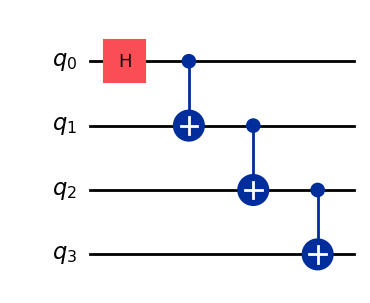

In [1]:
from qiskit import QuantumCircuit

def get_qc_for_n_qubit_GHZ_state(n):
    qc=QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 4
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

In [49]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z'+ 'I'*i + 'Z' + 'I'*(n-i-2) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZI', 'ZIZ']
2


In [50]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Set your instance (e.g., 'ibm-q/open/main' for free access)
service = QiskitRuntimeService(
    channel="ibm_quantum",
    token="0f66834006760c1b40ede93efc1c52d4824f24da9aab8e7fd28fa067412dc5ee384ebdaf18cf80b0915cff44c66c8c71a3e93154e8f32fc062065ae67ebb692e",
    instance="ibm-q/open/main"  # ← Add this line
)

print(service.backends())  # Should now work without warnings

C:\Users\Dell\AppData\Local\Temp\ipykernel_22256\2333000322.py:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService(


[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]


In [51]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token='0f66834006760c1b40ede93efc1c52d4824f24da9aab8e7fd28fa067412dc5ee384ebdaf18cf80b0915cff44c66c8c71a3e93154e8f32fc062065ae67ebb692e', overwrite=True)

In [52]:
backend = service.least_busy(operational=True, min_num_qubits=5)

In [53]:
print(                                 # Displays the details of the selected backend
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_brisbane
Version: 2
No. of qubits: 127



In [54]:
# First we have to transpile the quantum circuit 
from qiskit import transpile
qc_compiled = transpile(qc, backend, optimization_level=2)

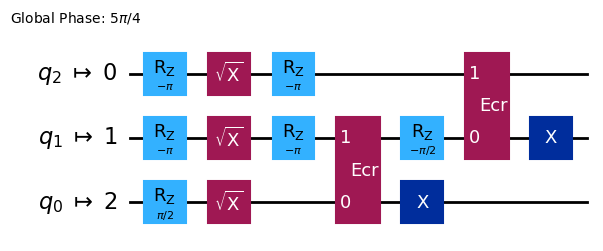

In [55]:
qc_compiled.draw('mpl')

In [56]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(mode=backend)
job = sampler.run([qc_compiled],shots=1024)  # shots define how many times the measurement made
# Getting the results
result = job.result()
pub_result = result[0]
print(pub_result.data.c.get_counts())

AttributeError: 'DataBin' object has no attribute 'c'

In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate

# 1a) Build the 4×4 diagonal matrix
O_mat = np.diag([1, 1, 1, -1])

# 1b) Wrap as a UnitaryGate
O_gate = UnitaryGate(O_mat, label="O")

# 1c) Check its action on the basis
print("O =\n", O_mat)


O =
 [[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]


{'11': 53, '01': 47}
Final amplitudes: [0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]


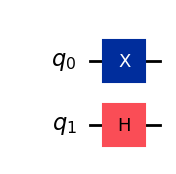

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# -- build your circuit --
qc = QuantumCircuit(2)
qc.x(0)           # set input to |10>
qc.h(1)           # some processing
# qc.cx(0,1)      # more gates, ….

# Option A: classical output
qc_classical = qc.copy()
qc_classical.measure_all()
backend = AerSimulator()
job     = backend.run(transpile(qc_classical, backend), shots=100)
print(job.result().get_counts())

# Option B: quantum output
sv = Statevector.from_instruction(qc)
print("Final amplitudes:", sv.data)

qc.draw('mpl')


000
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


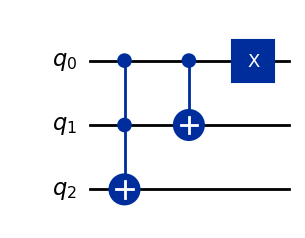

In [29]:
qc3 = QuantumCircuit(3)

qc3.ccx(0, 1, 2)
qc3.cx(0, 1)
qc3.x(0)

initial_state = Statevector.from_label('000')
print(max(initial_state.probabilities_dict(), key=initial_state.probabilities_dict().get))
for _ in range(8):
    final_state = initial_state.evolve(qc3)
    print(final_state.data)
    initial_state = final_state

qc3.draw('mpl')